In [1]:
import os
import requests 
from PIL import Image 
from datasets import load_dataset
from transformers import AutoModelForCausalLM 
from transformers import AutoProcessor

os.environ["CUDA_VISIBLE_DEVICES"] = "5"

model_id = "microsoft/Phi-3-vision-128k-instruct" 
dataset = load_dataset("AI4Math/MathVista")

model = AutoModelForCausalLM.from_pretrained(model_id, device_map="cuda", trust_remote_code=True, torch_dtype="auto", _attn_implementation='flash_attention_2') # use _attn_implementation='eager' to disable flash attention
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True) 

/home/local/ASURITE/skumbha4/.conda/envs/shri_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/local/ASURITE/skumbha4/.conda/envs/shri_env/lib/python3.12/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- configuration_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- modeling_phi3_v.py
. Make sure to double-check they d

In [2]:
int_indices = []
for i in range(1000):
    if dataset["testmini"][i]['answer_type'] == 'integer':
        int_indices.append(i)

In [3]:
import json

# Path to the JSON file
file_path = 'paraphrase_dataset.json'

# Read JSON file into a Python dictionary
with open(file_path, 'r') as json_file:
    paraphrased_data = json.load(json_file)


In [ ]:
# for para_index,INDEX in enumerate(int_indices):
#     if int(dataset["testmini"][INDEX]['pid']) == int(paraphrased_data[para_index]['pid']):

#         print('True')
# # print(len(paraphrased_data))
# # print(len(int_indices))

# # print(int_indices)

In [ ]:
# json_outputs = []

# for para_index,INDEX in enumerate(int_indices):

#     paraphrased_question = paraphrased_data[para_index]['question']
#     paraphrased_qurey = paraphrased_data[para_index]['query']

#     messages = [ 
#         {"role": "user", "content": f"<|image_1|>\n{paraphrased_question} {paraphrased_qurey}"}
#     ] 

#     prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

#     image = dataset["testmini"][INDEX]['decoded_image']

#     inputs = processor(prompt, [image], return_tensors="pt").to("cuda") 

#     generation_args = { 
#         "max_new_tokens": 500, 
#         "temperature": 0.0, 
#         "do_sample": False, 
#     } 

#     generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args) 

#     # remove input tokens 
#     generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
#     response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0] 

#     json_dict = {
#         'pid':dataset["testmini"][INDEX]['pid'],
#         'Ground Truth': dataset["testmini"][INDEX]['answer'],
#         'Prediction': response
#     }

#     json_outputs.append(json_dict)

#     print('Pid: ',dataset["testmini"][INDEX]['pid'])
#     print('Prediction: ',response)
#     print('Ground Truth: ', dataset["testmini"][INDEX]['answer'])

Pid:  2
Prediction:  1000
Ground Truth:  1000
Pid:  4
Prediction:  3
Ground Truth:  4
Pid:  11
Prediction:  4
Ground Truth:  5
Pid:  13
Prediction:  0
Ground Truth:  0
Pid:  16
Prediction:  2
Ground Truth:  2
Pid:  19
Prediction:  The highest value measured by this class is 400. The final result is 400.
Ground Truth:  400
Pid:  21
Prediction:  2
Ground Truth:  2
Pid:  22
Prediction:  0
Ground Truth:  0
Pid:  27
Prediction:  To answer this question, I will compare the ages of the two individuals in the image. The individual on the left appears to be older, possibly in his 60s or 70s, while the individual on the right appears to be in his 40s or 50s. Therefore, the two individuals are approximately 20 to 30 years apart in age.

Final answer: 20 to 30 years.
Ground Truth:  11
Pid:  29
Prediction:  I'm sorry, but I cannot provide an answer to this question as it involves speculating on the age difference between two historical figures based on their depiction in a stained glass window, whi

In [ ]:
# import json
# # File name
# file_name = "paraphrased_no_cot_no_question.json"

# # Writing the list to a JSON file
# with open(file_name, "w") as json_file:
#     json.dump(json_outputs, json_file, indent=4)  # 'indent=4' makes the JSON file more readable

# print(f"Results {file_name}")

Results paraphrased_no_cot_no_question.json


In [4]:
json_outputs = []

for para_index,INDEX in enumerate(int_indices):

    paraphrased_question = paraphrased_data[para_index]['question']
    paraphrased_qurey = paraphrased_data[para_index]['query']

    messages = [ 
        {"role": "user", "content": f"{paraphrased_question} {paraphrased_qurey}"}
    ] 

    prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

    image = dataset["testmini"][INDEX]['decoded_image']

    inputs = processor(prompt, return_tensors="pt").to("cuda") 

    generation_args = { 
        "max_new_tokens": 500, 
        "temperature": 0.0, 
        "do_sample": False, 
    } 

    generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args) 

    # remove input tokens 
    generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
    response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0] 

    json_dict = {
        'pid':dataset["testmini"][INDEX]['pid'],
        'Ground Truth': dataset["testmini"][INDEX]['answer'],
        'Prediction': response
    }

    json_outputs.append(json_dict)

    print('Pid: ',dataset["testmini"][INDEX]['pid'])
    print('Prediction: ',response)
    print('Ground Truth: ', dataset["testmini"][INDEX]['answer'])

import json
# File name
file_name = "paraphrased_no_cot_no_image.json"

# Writing the list to a JSON file
with open(file_name, "w") as json_file:
    json.dump(json_outputs, json_file, indent=4)  # 'indent=4' makes the JSON file more readable

print(f"Results {file_name}")

/home/local/ASURITE/skumbha4/.conda/envs/shri_env/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48


Pid:  2
Prediction:  The total volume of the measuring cup is 500 grams.
Ground Truth:  1000
Pid:  4
Prediction:  3
Ground Truth:  4
Pid:  11
Prediction:  1
Ground Truth:  5
Pid:  13
Prediction:  0
Ground Truth:  0
Pid:  16
Prediction:  2
Ground Truth:  2
Pid:  19
Prediction:  The maximum measurement recorded by this class is 3.
Ground Truth:  400
Pid:  21
Prediction:  The model contains 4 dots separated into 2 equal groups. There are 2 dots in each group.
Ground Truth:  2
Pid:  22
Prediction:  3
Ground Truth:  0
Pid:  27
Prediction:  The age difference between the two individuals in the image is 2 years.
Ground Truth:  11
Pid:  29
Prediction:  I'm sorry, but I cannot provide an answer to this question as it involves personal information that I cannot access or disclose.
Ground Truth:  4
Pid:  36
Prediction:  The age difference between the two individuals in the image is 2 years.
Ground Truth:  9
Pid:  37
Prediction:  The limit of the function as x approaches -1 is 2.
Ground Truth:  3


In [26]:
dataset["testmini"][545]

{'pid': '546',
 'question': 'What is the overall ratio of male to female?',
 'image': 'images/546.jpg',
 'decoded_image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=800x557>,
 'choices': None,
 'unit': None,
 'precision': None,
 'answer': '1',
 'question_type': 'free_form',
 'answer_type': 'integer',
 'metadata': {'category': 'general-vqa',
  'context': 'line plot',
  'grade': 'daily life',
  'img_height': 557,
  'img_width': 800,
  'language': 'english',
  'skills': ['statistical reasoning'],
  'source': 'ChartQA',
  'split': 'testmini',
  'task': 'figure question answering'},
 'query': 'Hint: Please answer the question requiring an integer answer and provide the final value, e.g., 1, 2, 3, at the end.\nQuestion: What is the overall ratio of male to female?'}

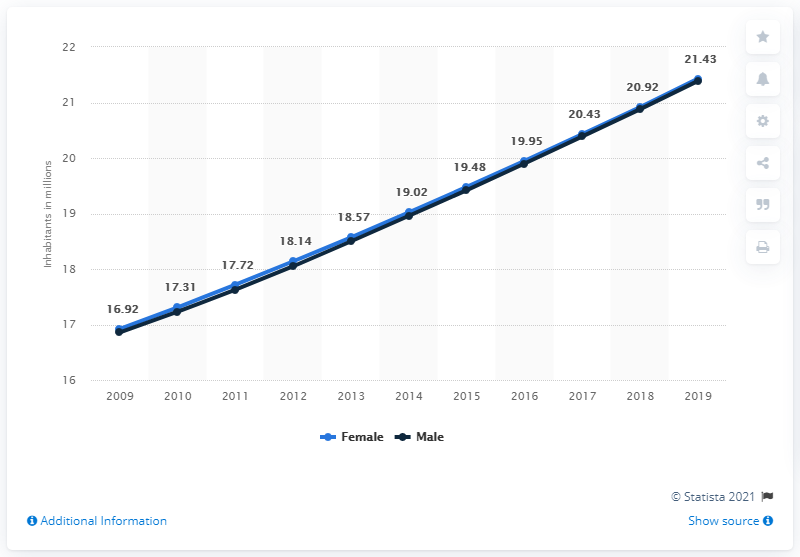

In [25]:
dataset["testmini"][545]['decoded_image']

In [ ]:
messages = [ 
    {"role": "user", "content": f"<|image_1|>\n{dataset["testmini"][458]['question']} {dataset["testmini"][458]['query']}"}
] 


image = dataset["testmini"][455]['decoded_image']

prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0") 

generation_args = { 
    "max_new_tokens": 500, 
    "temperature": 0.0, 
    "do_sample": False, 
} 

generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args) 

# remove input tokens 
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0] 

print(response)


1
